___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K-Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K-Means Clustering is an **unsupervised learning** algorithm that clusters data points based on their 'similarity'. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. 

In k-means clustering, we have to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the **centroid** of each cluster. Then, the algorithm iterates through two steps:

* Reassign data points to the cluster whose centroid is closest. 
* Calculate new *centroid* of each cluster. 

These two steps are repeated until the cluster variation within cannot be reduced any further. The cluster variation within is calculated as the sum of the Euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Create some 'clustered' data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# Create artificial 'clustered' data for 4 clusters, made up of 200 input vectors with 2 features (2-D)

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [4]:
# Note that there are two nested arrays in data - the first contains input vectors, the second contains associated clusters

data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [5]:
# Number of input vectors

len(data[0])

200

In [6]:
# Number of associated clusters (should match!)

len(data[1])

200

## Visualize 'clustered' data

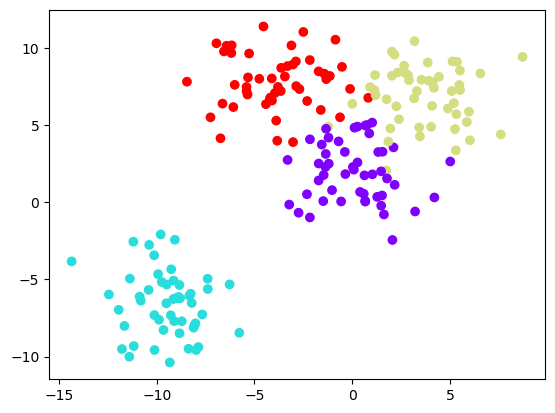

In [7]:
# Plot data from all rows in 1st column against data from all rows in 2nd column - make sure to colour by cluster no.

plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');

## Creating the Clusters using K-Means algorithm

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Four clusters

kmeans = KMeans(n_clusters=4)

In [10]:
# Fit model using input features only

kmeans.fit(data[0])

KMeans(n_clusters=4)

In [11]:
# Cluster centers (act like coordinates)

kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [12]:
# Predicted cluster no for each input vector

kmeans.labels_

array([1, 3, 2, 3, 3, 0, 3, 2, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 2, 3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 0, 2, 2, 1, 3, 2, 0, 1, 2, 2, 1, 3, 0, 3, 0, 1, 3, 2,
       0, 3, 3, 0, 3, 2, 0, 2, 0, 3, 3, 2, 1, 2, 2, 0, 3, 0, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 3, 2, 0, 2, 2, 3, 2, 0, 3, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 1, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 1, 3, 1, 3, 2, 0, 3, 0, 1, 1, 3, 2, 0, 1, 1, 1, 1, 2, 3,
       2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 0, 1, 2, 3, 1, 2, 3, 2, 1, 3, 2, 1,
       3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 3, 1, 0, 2, 3, 3,
       0, 2])

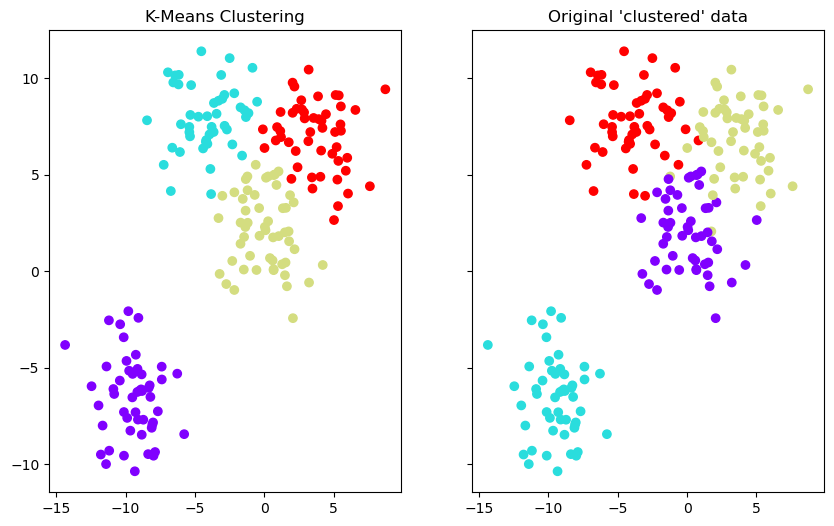

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

# Same data but coloured by predicted cluster no from K-Means model
ax1.set_title('K-Means Clustering')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')

# Same data but coloured by correct cluster no (from make_blobs function)
ax2.set_title("Original 'clustered' data")
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow');

Note that the colors are meaningless when comparing between the two plots.

If you see at the top of the purple cluster in the original data, in the middle of the three clusters, there is some overlapping which indicates 'noise'. The K-Means model does not detect this and determines the cluster arrangement slightly differently. However, the majority of the data points do match in position and separation...

# Great Job!